In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import docx

In [2]:
df = pd.read_csv('OS_4_df.tsv.gz', sep='\t')  #5 mil bases
df

#50,285 rows

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN
0,chr1,0,5000000,AAACCTGAGGAGTTTA,485820,541,0.760955,19,34,0.641509,20,1|1,1|1
1,chr1,0,5000000,AAACCTGAGGCTACGA,485820,574,0.806144,12,24,0.666667,20,1|1,1|1
2,chr1,0,5000000,AAACCTGCAGAGATCG,485820,820,1.232349,39,35,0.472973,20,1|1,1|1
3,chr1,0,5000000,AAACCTGGTCTTCGTC,485820,598,0.779433,15,13,0.464286,20,1|1,1|1
4,chr1,0,5000000,AAACCTGTCATTTCGT,485820,1103,1.155720,52,58,0.527273,20,1|1,1|1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456345,chr22,50000000,50818468,TTTGTCACACTTCTTA,86720,167,0.795140,10,8,0.444444,20,1|1,1|1
1456346,chr22,50000000,50818468,TTTGTCACATACTTGG,86720,122,0.791330,8,2,0.200000,20,1|1,1|1
1456347,chr22,50000000,50818468,TTTGTCACATCACTGA,86720,38,0.926346,4,4,0.500000,20,1|1,1|1
1456348,chr22,50000000,50818468,TTTGTCAGTACCTAGT,86720,194,0.976805,10,15,0.600000,20,1|1,1|1


In [3]:
len(df['CELL'].unique())  #no. of cells in df

2555

In [4]:
df['CHR'] = df['#CHR'].str.replace('chr','').astype(int) #CHR COLUMN


df['TOTAL_CN'] = df['CORRECTED_HAP_CN'].str.split('|', expand=True).astype(int).sum(axis=1)  #TOTAL CN COLUMN (using corrected HAP_CN column, ask Simone)
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN
0,chr1,0,5000000,AAACCTGAGGAGTTTA,485820,541,0.760955,19,34,0.641509,20,1|1,1|1,1,2
1,chr1,0,5000000,AAACCTGAGGCTACGA,485820,574,0.806144,12,24,0.666667,20,1|1,1|1,1,2
2,chr1,0,5000000,AAACCTGCAGAGATCG,485820,820,1.232349,39,35,0.472973,20,1|1,1|1,1,2
3,chr1,0,5000000,AAACCTGGTCTTCGTC,485820,598,0.779433,15,13,0.464286,20,1|1,1|1,1,2
4,chr1,0,5000000,AAACCTGTCATTTCGT,485820,1103,1.155720,52,58,0.527273,20,1|1,1|1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456345,chr22,50000000,50818468,TTTGTCACACTTCTTA,86720,167,0.795140,10,8,0.444444,20,1|1,1|1,22,2
1456346,chr22,50000000,50818468,TTTGTCACATACTTGG,86720,122,0.791330,8,2,0.200000,20,1|1,1|1,22,2
1456347,chr22,50000000,50818468,TTTGTCACATCACTGA,86720,38,0.926346,4,4,0.500000,20,1|1,1|1,22,2
1456348,chr22,50000000,50818468,TTTGTCAGTACCTAGT,86720,194,0.976805,10,15,0.600000,20,1|1,1|1,22,2


Scatterplot to analyse a single random unique cell from the DF

NO. of unique cells

In [5]:
len(df['CELL'].unique()) # 1447 unique cells

2555

prop unique cells in OS_1_DF = 0.175%  chisel DF = 0.175% unique, so around the same


------------------------------------------------------------------------------------------------------------------------------------------------

Heatmap showing genome-wide RDRs of all cells in the OS_1_DF

In [6]:
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN
0,chr1,0,5000000,AAACCTGAGGAGTTTA,485820,541,0.760955,19,34,0.641509,20,1|1,1|1,1,2
1,chr1,0,5000000,AAACCTGAGGCTACGA,485820,574,0.806144,12,24,0.666667,20,1|1,1|1,1,2
2,chr1,0,5000000,AAACCTGCAGAGATCG,485820,820,1.232349,39,35,0.472973,20,1|1,1|1,1,2
3,chr1,0,5000000,AAACCTGGTCTTCGTC,485820,598,0.779433,15,13,0.464286,20,1|1,1|1,1,2
4,chr1,0,5000000,AAACCTGTCATTTCGT,485820,1103,1.155720,52,58,0.527273,20,1|1,1|1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456345,chr22,50000000,50818468,TTTGTCACACTTCTTA,86720,167,0.795140,10,8,0.444444,20,1|1,1|1,22,2
1456346,chr22,50000000,50818468,TTTGTCACATACTTGG,86720,122,0.791330,8,2,0.200000,20,1|1,1|1,22,2
1456347,chr22,50000000,50818468,TTTGTCACATCACTGA,86720,38,0.926346,4,4,0.500000,20,1|1,1|1,22,2
1456348,chr22,50000000,50818468,TTTGTCAGTACCTAGT,86720,194,0.976805,10,15,0.600000,20,1|1,1|1,22,2


In [7]:
pt_RDR = pd.pivot_table(data=df, index='CELL', columns= ['CHR', 'START', 'END'], values='RDR')
pt_RDR

CHR                     1                                                     \
START             0         5000000   10000000  15000000  20000000  25000000   
END               5000000   10000000  15000000  20000000  25000000  30000000   
CELL                                                                           
AAACCTGAGGAGTTTA  0.760955  0.890887  0.986036  0.874255  1.014053  0.990988   
AAACCTGAGGCTACGA  0.806144  0.873471  0.964924  0.875357  1.005093  0.925196   
AAACCTGCAGAGATCG  1.232349  1.244051  1.106707  1.182595  1.210476  1.182924   
AAACCTGGTCTTCGTC  0.779433  0.973451  0.974383  0.924090  0.951146  1.089093   
AAACCTGTCATTTCGT  1.155720  1.150325  1.136421  1.194580  1.138170  1.212181   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCACACTTCTTA  0.896651  1.085591  1.098239  1.077121  1.125211  1.111394   
TTTGTCACATACTTGG  0.702797  0.976762  1.004601  0.999284  0.983521  1.147223   
TTTGTCACATCACTGA  0.935561  1.067988  1.093789  1.054736  1.003575  1.062282   
TTTGTCAGTACCTAGT  1.259181  1.221538  1.250914  1.254202  1.192280  1.195461   
TTTGTCAGTGCCATTA  0.775234  0.924663  1.110176  1.032305  1.091862  1.094826   

CHR                                                       ...        21  \
START             30000000  35000000  40000000  45000000  ...  45000000   
END               35000000  40000000  45000000  50000000  ...  46709983   
CELL                                                      ...             
AAACCTGAGGAGTTTA  0.928430  1.026711  1.006222  1.083167  ...  0.849026   
AAACCTGAGGCTACGA  0.994549  0.986815  0.979976  1.114855  ...  0.847735   
AAACCTGCAGAGATCG  1.250827  1.269027  1.114781  1.112403  ...  1.241567   
AAACCTGGTCTTCGTC  0.936678  1.007638  1.006965  1.094236  ...  0.740079   
AAACCTGTCATTTCGT  1.109333  1.163388  1.130341  1.112690  ...  1.205972   
...                    ...       ...       ...       ...  ...       ...   
TTTGTCACACTTCTTA  1.087809  1.032720  1.097092  1.152087  ...  0.884735   
TTTGTCACATACTTGG  1.076007  1.053111  1.001467  1.100264  ...  0.986128   
TTTGTCACATCACTGA  1.107050  1.260555  1.144845  1.128458  ...  1.046186   
TTTGTCAGTACCTAGT  1.151140  1.224257  1.314386  1.095863  ...  1.216055   
TTTGTCAGTGCCATTA  1.074442  1.019882  1.111490  1.188608  ...  1.078880   

CHR                     22                                                    \
START             10000000  15000000  20000000  25000000  30000000  35000000   
END               15000000  20000000  25000000  30000000  35000000  40000000   
CELL                                                                           
AAACCTGAGGAGTTTA  0.704784  0.991516  0.953665  1.189301  1.020710  0.966970   
AAACCTGAGGCTACGA  0.694988  0.893014  0.915133  0.971251  0.959861  0.943361   
AAACCTGCAGAGATCG  0.619230  1.186451  1.197518  1.198818  1.236000  1.075286   
AAACCTGGTCTTCGTC  0.644992  0.931205  0.856675  0.913854  1.011191  0.875498   
AAACCTGTCATTTCGT  0.718099  1.058009  1.134291  1.115636  1.150214  1.181884   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCACACTTCTTA  0.596554  1.024160  0.972960  1.101593  1.129594  1.083713   
TTTGTCACATACTTGG  0.690419  0.976092  0.920395  1.055520  1.023516  0.975435   
TTTGTCACATCACTGA  0.729789  1.067375  1.087389  1.124227  1.178885  0.945077   
TTTGTCAGTACCTAGT  0.729483  1.094818  1.181458  1.125839  1.119439  1.173572   
TTTGTCAGTGCCATTA  0.698706  0.950251  0.958946  1.037336  1.093043  0.988419   

CHR                                             
START             40000000  45000000  50000000  
END               45000000  50000000  50818468  
CELL                                            
AAACCTGAGGAGTTTA  0.998040  0.970420  0.866783  
AAACCTGAGGCTACGA  0.956909  0.840238  0.794654  
AAACCTGCAGAGATCG  1.177640  1.105720  1.599667  
AAACCTGGTCTTCGTC  0.963897  0.841771  0.868922  
AAACCTGTCATTTCGT  1.162769  1.163155  1.191597  
...                    ...     

Before I make finished heatmap, need to add chromosome axis

In [8]:
chromosome_colours= {1:'black', 2:'gray', 3:'black', 4:'gray', 5:'black', 6:'gray',
                     7:'black', 8:'gray', 9:'black', 10:'gray', 11:'black', 12:'gray',
                     13:'black', 14:'gray', 15:'black', 16:'gray', 17:'black', 18:'gray',
                     19:'black', 20:'gray', 21:'black', 22:'gray'}
#making a dictionary corresponding to the chromosomes and the colours we want them to be in the heatmap


df['COLOUR']=df['CHR'].map(chromosome_colours) #adding a column to the df called colours, where colour mapped to the chromosome

#new df called df_colours, 

df_colours=df[['CHR', 'START', 'END', 'COLOUR']]

chrome_colours = df_colours.drop_duplicates().set_index(['CHR', 'START', 'END'])
chrome_colours


COLOUR
CHR START    END            
1   0        5000000   black
    5000000  10000000  black
    10000000 15000000  black
    15000000 20000000  black
    20000000 25000000  black
...                      ...
22  30000000 35000000   gray
    35000000 40000000   gray
    40000000 45000000   gray
    45000000 50000000   gray
    50000000 50818468   gray

[570 rows x 1 columns]

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

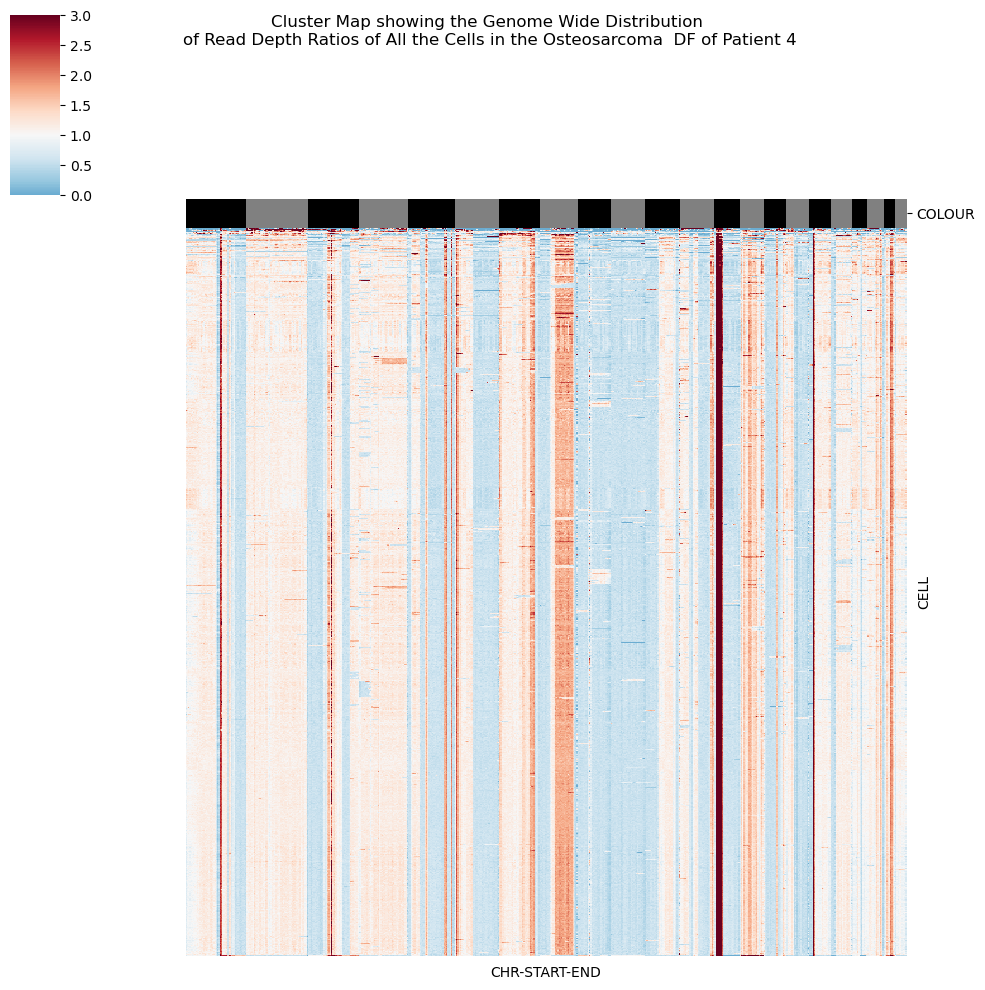

In [9]:
plt.figure(figsize= (12, 6))

genome_RDR_heatmap = sns.clustermap(data = pt_RDR, vmin=0, vmax=3,cmap='RdBu_r', center=1, xticklabels= False, 
                                    yticklabels = False, col_cluster= False, col_colors=chrome_colours)
genome_RDR_heatmap.ax_row_dendrogram.set_visible(False)

genome_RDR_heatmap.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Read Depth Ratios of All the Cells in the Osteosarcoma  DF of Patient 4""")

genome_RDR_heatmap

plt.savefig('OS_4_Genome_RDR.png', dpi=300)

Aim: Make a plot showing genome-wide HDs of all cells

In [10]:
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR
0,chr1,0,5000000,AAACCTGAGGAGTTTA,485820,541,0.760955,19,34,0.641509,20,1|1,1|1,1,2,black
1,chr1,0,5000000,AAACCTGAGGCTACGA,485820,574,0.806144,12,24,0.666667,20,1|1,1|1,1,2,black
2,chr1,0,5000000,AAACCTGCAGAGATCG,485820,820,1.232349,39,35,0.472973,20,1|1,1|1,1,2,black
3,chr1,0,5000000,AAACCTGGTCTTCGTC,485820,598,0.779433,15,13,0.464286,20,1|1,1|1,1,2,black
4,chr1,0,5000000,AAACCTGTCATTTCGT,485820,1103,1.155720,52,58,0.527273,20,1|1,1|1,1,2,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456345,chr22,50000000,50818468,TTTGTCACACTTCTTA,86720,167,0.795140,10,8,0.444444,20,1|1,1|1,22,2,gray
1456346,chr22,50000000,50818468,TTTGTCACATACTTGG,86720,122,0.791330,8,2,0.200000,20,1|1,1|1,22,2,gray
1456347,chr22,50000000,50818468,TTTGTCACATCACTGA,86720,38,0.926346,4,4,0.500000,20,1|1,1|1,22,2,gray
1456348,chr22,50000000,50818468,TTTGTCAGTACCTAGT,86720,194,0.976805,10,15,0.600000,20,1|1,1|1,22,2,gray


In [11]:
df['HOMO_DEL'] = np.where(df['RDR'] <= 0.01350, True, False)
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL
0,chr1,0,5000000,AAACCTGAGGAGTTTA,485820,541,0.760955,19,34,0.641509,20,1|1,1|1,1,2,black,False
1,chr1,0,5000000,AAACCTGAGGCTACGA,485820,574,0.806144,12,24,0.666667,20,1|1,1|1,1,2,black,False
2,chr1,0,5000000,AAACCTGCAGAGATCG,485820,820,1.232349,39,35,0.472973,20,1|1,1|1,1,2,black,False
3,chr1,0,5000000,AAACCTGGTCTTCGTC,485820,598,0.779433,15,13,0.464286,20,1|1,1|1,1,2,black,False
4,chr1,0,5000000,AAACCTGTCATTTCGT,485820,1103,1.155720,52,58,0.527273,20,1|1,1|1,1,2,black,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456345,chr22,50000000,50818468,TTTGTCACACTTCTTA,86720,167,0.795140,10,8,0.444444,20,1|1,1|1,22,2,gray,False
1456346,chr22,50000000,50818468,TTTGTCACATACTTGG,86720,122,0.791330,8,2,0.200000,20,1|1,1|1,22,2,gray,False
1456347,chr22,50000000,50818468,TTTGTCACATCACTGA,86720,38,0.926346,4,4,0.500000,20,1|1,1|1,22,2,gray,False
1456348,chr22,50000000,50818468,TTTGTCAGTACCTAGT,86720,194,0.976805,10,15,0.600000,20,1|1,1|1,22,2,gray,False


DF to show how many rows have HDs

In [12]:
df_HD=df[df['HOMO_DEL'] == True]
df_HD

#232 regions

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL
1254,chr1,0,5000000,CTCGGGAGTGTGTTCA,485820,2,0.006346,0,0,0.5,20,1|1,1|1,1,2,black,True
1496,chr1,0,5000000,GATCAGTTCACTCATT,485820,3,0.012407,0,0,0.5,20,1|1,1|1,1,2,black,True
2420,chr1,0,5000000,TGTTCCGCAGGGACTA,485820,6,0.008927,0,1,1.0,20,1|1,1|1,1,2,black,True
3138,chr1,5000000,10000000,CAAGGCCGTATGTACC,552264,1,0.005098,0,0,0.5,20,1|1,1|1,1,2,black,True
3809,chr1,5000000,10000000,CTCGGGAGTGTGTTCA,552264,2,0.005582,0,0,0.5,20,1|1,1|1,1,2,black,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454202,chr22,50000000,50818468,AGGTCATAGGGTAGGG,0,0,0.000000,0,0,0.5,20,0|1,0|1,22,1,gray,True
1454995,chr22,50000000,50818468,CTAGTGACAACCTGAT,0,0,0.000000,0,0,0.5,20,0|1,0|1,22,1,gray,True
1455049,chr22,50000000,50818468,CTCGGGAGTGTGTTCA,0,0,0.000000,0,0,0.5,20,1|1,1|1,22,2,gray,True
1455221,chr22,50000000,50818468,GACAGAGGTGCATGAG,0,0,0.000000,0,0,0.5,20,1|1,1|1,22,2,gray,True


In [13]:
HD_table = pd.pivot_table(data=df, index='CELL', columns=['CHR', 'START', 'END'], values= 'HOMO_DEL') 
HD_table

CHR                    1                                                \
START            0        5000000  10000000 15000000 20000000 25000000   
END              5000000  10000000 15000000 20000000 25000000 30000000   
CELL                                                                     
AAACCTGAGGAGTTTA      0.0      0.0      0.0      0.0      0.0      0.0   
AAACCTGAGGCTACGA      0.0      0.0      0.0      0.0      0.0      0.0   
AAACCTGCAGAGATCG      0.0      0.0      0.0      0.0      0.0      0.0   
AAACCTGGTCTTCGTC      0.0      0.0      0.0      0.0      0.0      0.0   
AAACCTGTCATTTCGT      0.0      0.0      0.0      0.0      0.0      0.0   
...                   ...      ...      ...      ...      ...      ...   
TTTGTCACACTTCTTA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCACATACTTGG      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCACATCACTGA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCAGTACCTAGT      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCAGTGCCATTA      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                                   ...       21       22  \
START            30000000 35000000 40000000 45000000  ... 45000000 10000000   
END              35000000 40000000 45000000 50000000  ... 46709983 15000000   
CELL                                                  ...                     
AAACCTGAGGAGTTTA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAACCTGAGGCTACGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAACCTGCAGAGATCG      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAACCTGGTCTTCGTC      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAACCTGTCATTTCGT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
...                   ...      ...      ...      ...  ...      ...      ...   
TTTGTCACACTTCTTA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGTCACATACTTGG      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGTCACATCACTGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGTCAGTACCTAGT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGTCAGTGCCATTA      0.0      0.0      0.0      0.0  ...      0.0      0.0   

CHR                                                                     \
START            15000000 20000000 25000000 30000000 35000000 40000000   
END              20000000 25000000 30000000 35000000 40000000 45000000   
CELL                                                                     
AAACCTGAGGAGTTTA      0.0      0.0      0.0      0.0      0.0      0.0   
AAACCTGAGGCTACGA      0.0      0.0      0.0      0.0      0.0      0.0   
AAACCTGCAGAGATCG      0.0      0.0      0.0      0.0      0.0      0.0   
AAACCTGGTCTTCGTC      0.0      0.0      0.0      0.0      0.0      0.0   
AAACCTGTCATTTCGT      0.0      0.0      0.0      0.0      0.0      0.0   
...                   ...      ...      ...      ...      ...      ...   
TTTGTCACACTTCTTA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCACATACTTGG      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCACATCACTGA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCAGTACCTAGT      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCAGTGCCATTA      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                 
START            45000000 50000000  
END              50000000 50818468  
CELL                                
AAACCTGAGGAGTTTA      0.0      0.0  
AAACCTGAGGCTACGA      0.0      0.0  
AAACCTGCAGAGATCG      0.0      0.0  
AAACCTGGTCTTCGTC      0.0      0.0  
AAACCTGTCATTTCGT      0.0      0.0  
...                   ...      ...  
TTTGTCACACTTCTTA      0.0      0.0  
TTTGTCACATACTTGG      0.0      0.0  
TTTGTCACATCACTGA      0.0      0.0  
TTTGTCAGTACCTAGT      0.0      0.0  
TTTGTCAGTGCCATTA      0.0      0.0  

[2555 rows x 570 columns]

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

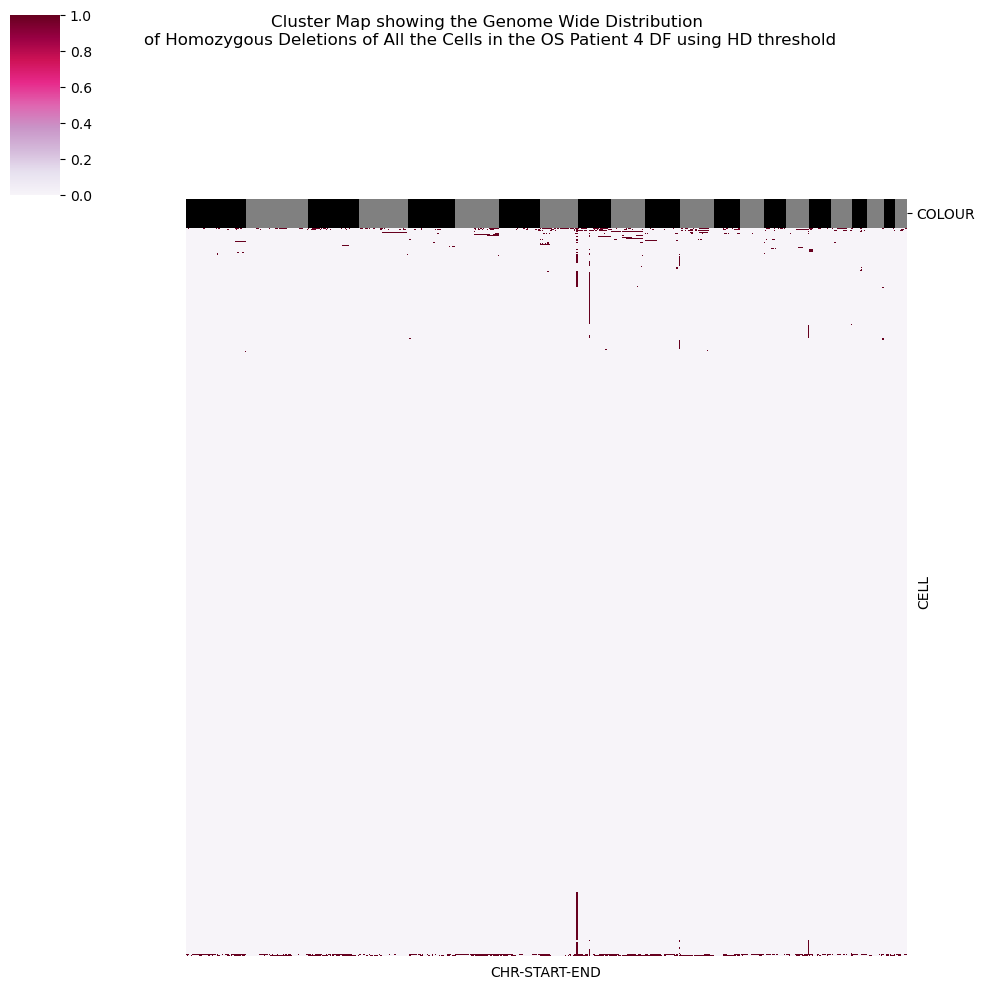

In [14]:
plt.figure(figsize=(12, 6))
HD_heatmap = sns.clustermap(data=HD_table, vmin=0, vmax=1, cmap='PuRd', xticklabels=False, 
                            yticklabels=False, col_cluster=False, row_cluster = True, col_colors=chrome_colours)

HD_heatmap.ax_row_dendrogram.set_visible(False)
HD_heatmap.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Homozygous Deletions of All the Cells in the OS Patient 4 DF using HD threshold""")
HD_heatmap

plt.savefig('OS_4_Appendix_HD.png', dpi=300)

oh wow ... it's giving nothing :|

AIM: Heatmap that shows genome-wide distribution of HDs in cells in OS Patient 1 DF that contain at least 1 HD

In [15]:
len(df_HD['CELL'].unique())

659

In [16]:
unique_HD =df_HD['CELL'].unique()
print(unique_HD) 

['CTCGGGAGTGTGTTCA' 'GATCAGTTCACTCATT' 'TGTTCCGCAGGGACTA'
 'CAAGGCCGTATGTACC' 'GTTACAGTCAGTACAC' 'TGTCCCAAGTGTACGG'
 'ACTTGTTGTACCACTA' 'CTAGTGACAACCTGAT' 'GTACGTAGTGCGGTAA'
 'AGATCTGCAGGAGCAT' 'CACATAGTCCAACGAT' 'CTCGAAAGTTGCAGCC'
 'GACAGAGGTGCATGAG' 'AGGCCGTGTGGAAGGG' 'CTCGTCACATTGTCTT'
 'TCTTCGGGTCAAGTTC' 'TGCGTGGAGTGAACGC' 'AGGTCATAGGGTAGGG'
 'AACCGCGCACCAGTGC' 'GTTTCTAGTTGACGGA' 'GCTTGAATCTGATCAG'
 'CATGGCGGTAGAACAT' 'CTAATGGGTGCTTTGA' 'CGTCAGGCAGTTAGCT'
 'TGACTAGTCTTTCGTA' 'TGGCCAGTCCAACGAT' 'TTTACTGTCGGGCTCA'
 'GATGAAAAGTTGTCGT' 'CTAAGACGTGCTCGAC' 'GCATGCGAGACAGACC'
 'CGACTTCAGTGATCGG' 'CTTCTCTAGAGACTTA' 'GAAGCAGAGAAAGTGG'
 'AAAGCAACAGCTCATA' 'ACTATCTTCTCCTGGT' 'AGCGTATGTCCAGTGC'
 'AGCTTGACATTGAAAG' 'CGCTGGAGTCGTAATC' 'GGATGTTGTGCAAACG'
 'TATCTCATCAGACACT' 'TGCTACCGTCAACATC' 'ACTTACTAGCAGTAGC'
 'TGAGAGGGTGCTTTCC' 'GTGCTTCCAAACTCAC' 'CACAGTAGTCTTAGTG'
 'TAAGAGATCTCTTCCT' 'GGGTCTGGTACTCCGG' 'TCTTCGGTCGACAACT'
 'TCTTCGGGTCAACATC' 'TTTCCTCCATTATCGG' 'GGCGTGTTCAAAGTGA'
 'CCATTCGTCTAC

In [17]:
cells_w_HD = df[df['CELL'].isin(unique_HD)]
cells_w_HD

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL
5,chr1,0,5000000,AAACCTGTCCGAGATT,485820,516,0.912471,28,21,0.428571,20,1|1,1|1,1,2,black,False
6,chr1,0,5000000,AAACGGGAGGCATTCT,485820,157,0.689603,9,5,0.357143,20,1|1,1|1,1,2,black,False
16,chr1,0,5000000,AAAGCAACAGCTCATA,485820,151,1.020420,16,6,0.272727,20,1|1,1|1,1,2,black,False
18,chr1,0,5000000,AAAGCAATCGACAATC,485820,227,0.624371,8,5,0.384615,20,1|1,1|1,1,2,black,False
19,chr1,0,5000000,AAAGCAATCTTAAGGC,485820,242,0.823173,15,14,0.482759,20,1|1,1|1,1,2,black,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456331,chr22,50000000,50818468,TTTGCGCGTACTGCTA,86720,24,0.625044,1,0,0.000000,20,1|1,1|1,22,2,gray,False
1456335,chr22,50000000,50818468,TTTGGTTAGACAGAGA,86720,42,0.784005,3,2,0.400000,20,1|1,1|1,22,2,gray,False
1456338,chr22,50000000,50818468,TTTGGTTGTCGGATGA,86720,30,0.679481,0,0,0.500000,20,1|1,1|1,22,2,gray,False
1456339,chr22,50000000,50818468,TTTGGTTGTGCGCTTG,86720,63,1.583871,9,2,0.181818,20,1|1,1|1,22,2,gray,False


In [18]:
HD_updated_table = pd.pivot_table(data=cells_w_HD, index='CELL', columns=['CHR', 'START', 'END'], values= 'HOMO_DEL') 
HD_updated_table

CHR                    1                                                \
START            0        5000000  10000000 15000000 20000000 25000000   
END              5000000  10000000 15000000 20000000 25000000 30000000   
CELL                                                                     
AAACCTGTCCGAGATT      0.0      0.0      0.0      0.0      0.0      0.0   
AAACGGGAGGCATTCT      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAACAGCTCATA      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAATCGACAATC      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAATCTTAAGGC      0.0      0.0      0.0      0.0      0.0      0.0   
...                   ...      ...      ...      ...      ...      ...   
TTTGCGCGTACTGCTA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTAGACAGAGA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTGTCGGATGA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTGTGCGCTTG      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCACATCACTGA      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                                   ...       21       22  \
START            30000000 35000000 40000000 45000000  ... 45000000 10000000   
END              35000000 40000000 45000000 50000000  ... 46709983 15000000   
CELL                                                  ...                     
AAACCTGTCCGAGATT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAACGGGAGGCATTCT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAAGCAACAGCTCATA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAAGCAATCGACAATC      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAAGCAATCTTAAGGC      0.0      0.0      0.0      0.0  ...      0.0      0.0   
...                   ...      ...      ...      ...  ...      ...      ...   
TTTGCGCGTACTGCTA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGGTTAGACAGAGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGGTTGTCGGATGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGGTTGTGCGCTTG      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGTCACATCACTGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   

CHR                                                                     \
START            15000000 20000000 25000000 30000000 35000000 40000000   
END              20000000 25000000 30000000 35000000 40000000 45000000   
CELL                                                                     
AAACCTGTCCGAGATT      0.0      0.0      0.0      0.0      0.0      0.0   
AAACGGGAGGCATTCT      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAACAGCTCATA      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAATCGACAATC      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAATCTTAAGGC      0.0      0.0      0.0      0.0      0.0      0.0   
...                   ...      ...      ...      ...      ...      ...   
TTTGCGCGTACTGCTA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTAGACAGAGA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTGTCGGATGA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTGTGCGCTTG      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCACATCACTGA      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                 
START            45000000 50000000  
END              50000000 50818468  
CELL                                
AAACCTGTCCGAGATT      0.0      0.0  
AAACGGGAGGCATTCT      0.0      0.0  
AAAGCAACAGCTCATA      0.0      0.0  
AAAGCAATCGACAATC      0.0      0.0  
AAAGCAATCTTAAGGC      0.0      0.0  
...                   ...      ...  
TTTGCGCGTACTGCTA      0.0      0.0  
TTTGGTTAGACAGAGA      0.0      0.0  
TTTGGTTGTCGGATGA      0.0      0.0  
TTTGGTTGTGCGCTTG      0.0      0.0  
TTTGTCACATCACTGA      0.0      0.0  

[659 rows x 570 columns]

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

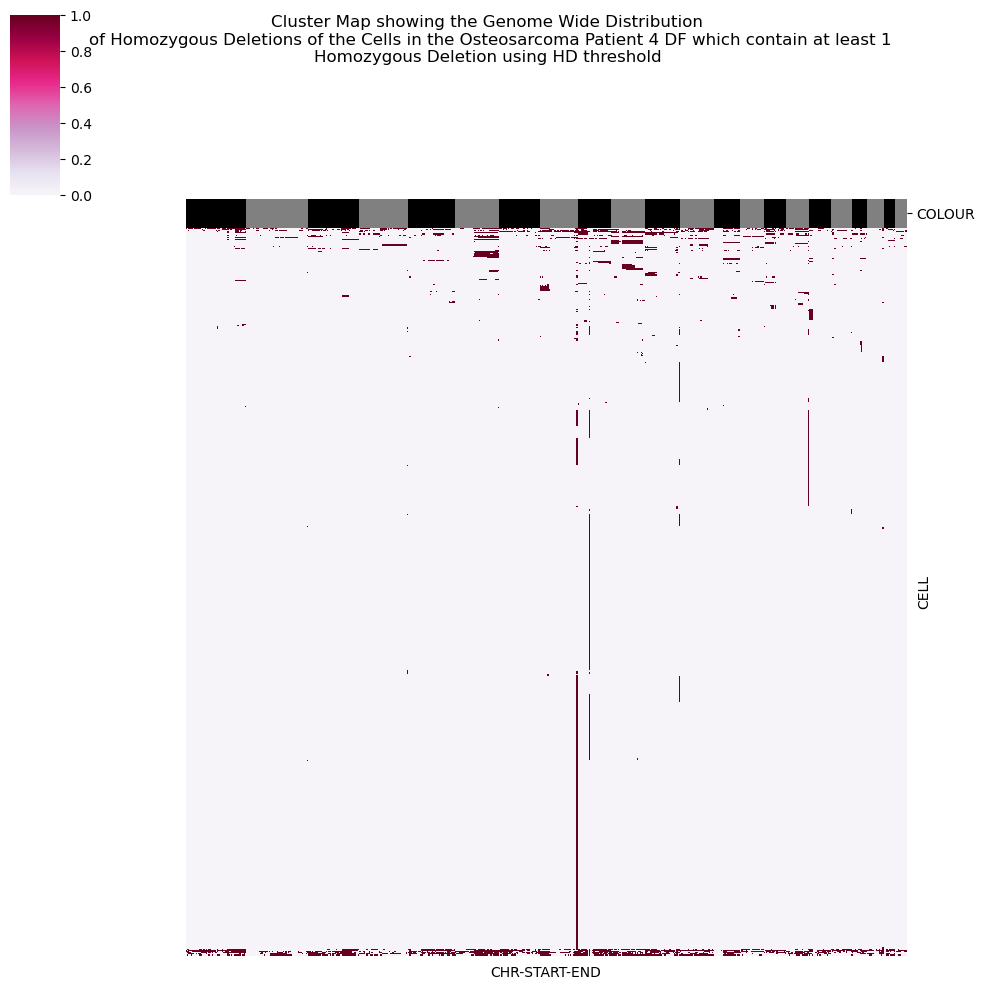

In [19]:
plt.figure(figsize=(12, 6))

HD_heatmap_2 = sns.clustermap(data=HD_updated_table, vmin=0, vmax=1, cmap='PuRd', xticklabels=False, yticklabels=False, 
                              col_cluster=False, row_cluster = True, col_colors=chrome_colours)
HD_heatmap_2.ax_row_dendrogram.set_visible(False)
HD_heatmap_2.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Homozygous Deletions of the Cells in the Osteosarcoma Patient 4 DF which contain at least 1
Homozygous Deletion using HD threshold """)
HD_heatmap_2

plt.savefig('OS_4_at_least_1_HD.png', dpi=300)


Show total no. HDs that each cell contains

In [20]:
cells_w_HD.groupby('CELL')['HOMO_DEL'].sum() #showing totla no. hDs for each cell throughout genome

CELL
AAACCTGTCCGAGATT    2
AAACGGGAGGCATTCT    1
AAAGCAACAGCTCATA    2
AAAGCAATCGACAATC    1
AAAGCAATCTTAAGGC    1
                   ..
TTTGCGCGTACTGCTA    1
TTTGGTTAGACAGAGA    1
TTTGGTTGTCGGATGA    1
TTTGGTTGTGCGCTTG    1
TTTGTCACATCACTGA    1
Name: HOMO_DEL, Length: 659, dtype: int64

Shows total no. HDs that each genomic region contains

In [21]:
group_HD =cells_w_HD.groupby(['CHR', 'START', 'END'])['HOMO_DEL'].sum() 
group_HD

CHR  START     END     
1    0         5000000     3
     5000000   10000000    4
     10000000  15000000    7
     15000000  20000000    4
     20000000  25000000    4
                          ..
22   30000000  35000000    5
     35000000  40000000    4
     40000000  45000000    3
     45000000  50000000    3
     50000000  50818468    5
Name: HOMO_DEL, Length: 570, dtype: int64

creating column called cells w/ HD here, which shows no. cells that have HDs in each genomic region of the DF

In [22]:
cells_w_HD['NCELLS_WITH_HD_HERE'] = cells_w_HD.groupby(['CHR', 'START', 'END'])['HOMO_DEL'].transform('sum')
cells_w_HD.copy()

/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_2797/1789297853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cells_w_HD['NCELLS_WITH_HD_HERE'] = cells_w_HD.groupby(['CHR', 'START', 'END'])['HOMO_DEL'].transform('sum')


,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE
5,chr1,0,5000000,AAACCTGTCCGAGATT,485820,516,0.912471,28,21,0.428571,20,1|1,1|1,1,2,black,False,3
6,chr1,0,5000000,AAACGGGAGGCATTCT,485820,157,0.689603,9,5,0.357143,20,1|1,1|1,1,2,black,False,3
16,chr1,0,5000000,AAAGCAACAGCTCATA,485820,151,1.020420,16,6,0.272727,20,1|1,1|1,1,2,black,False,3
18,chr1,0,5000000,AAAGCAATCGACAATC,485820,227,0.624371,8,5,0.384615,20,1|1,1|1,1,2,black,False,3
19,chr1,0,5000000,AAAGCAATCTTAAGGC,485820,242,0.823173,15,14,0.482759,20,1|1,1|1,1,2,black,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456331,chr22,50000000,50818468,TTTGCGCGTACTGCTA,86720,24,0.625044,1,0,0.000000,20,1|1,1|1,22,2,gray,False,5
1456335,chr22,50000000,50818468,TTTGGTTAGACAGAGA,86720,42,0.784005,3,2,0.400000,20,1|1,1|1,22,2,gray,False,5
1456338,chr22,50000000,50818468,TTTGGTTGTCGGATGA,86720,30,0.679481,0,0,0.500000,20,1|1,1|1,22,2,gray,False,5
1456339,chr22,50000000,50818468,TTTGGTTGTGCGCTTG,86720,63,1.583871,9,2,0.181818,20,1|1,1|1,22,2,gray,False,5


Creating a Column with T/F values that indicates whether there are more than 10HDs in a specific genetic locus of the genome

In [23]:
cells_w_HD['HD>10'] = cells_w_HD['NCELLS_WITH_HD_HERE'] > 10  #make a separate column so have both of the conditions being true
cells_w_HD

/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_2797/1308990806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cells_w_HD['HD>10'] = cells_w_HD['NCELLS_WITH_HD_HERE'] > 10  #make a separate column so have both of the conditions being true


,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE,HD>10
5,chr1,0,5000000,AAACCTGTCCGAGATT,485820,516,0.912471,28,21,0.428571,20,1|1,1|1,1,2,black,False,3,False
6,chr1,0,5000000,AAACGGGAGGCATTCT,485820,157,0.689603,9,5,0.357143,20,1|1,1|1,1,2,black,False,3,False
16,chr1,0,5000000,AAAGCAACAGCTCATA,485820,151,1.020420,16,6,0.272727,20,1|1,1|1,1,2,black,False,3,False
18,chr1,0,5000000,AAAGCAATCGACAATC,485820,227,0.624371,8,5,0.384615,20,1|1,1|1,1,2,black,False,3,False
19,chr1,0,5000000,AAAGCAATCTTAAGGC,485820,242,0.823173,15,14,0.482759,20,1|1,1|1,1,2,black,False,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456331,chr22,50000000,50818468,TTTGCGCGTACTGCTA,86720,24,0.625044,1,0,0.000000,20,1|1,1|1,22,2,gray,False,5,False
1456335,chr22,50000000,50818468,TTTGGTTAGACAGAGA,86720,42,0.784005,3,2,0.400000,20,1|1,1|1,22,2,gray,False,5,False
1456338,chr22,50000000,50818468,TTTGGTTGTCGGATGA,86720,30,0.679481,0,0,0.500000,20,1|1,1|1,22,2,gray,False,5,False
1456339,chr22,50000000,50818468,TTTGGTTGTGCGCTTG,86720,63,1.583871,9,2,0.181818,20,1|1,1|1,22,2,gray,False,5,False


Creating a separate column where both the conditions of HD>10 (for a specific genetic locus) and HD status of a cell is true

In [24]:
cells_w_HD['cells_with_HD_>10'] = (cells_w_HD['HOMO_DEL'] == True) & (cells_w_HD['HD>10'] == True)
cells_w_HD

/var/folders/zj/ww00cy3n0dg4jg01vzxf6z6w0000gp/T/ipykernel_2797/3652765624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cells_w_HD['cells_with_HD_>10'] = (cells_w_HD['HOMO_DEL'] == True) & (cells_w_HD['HD>10'] == True)


,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE,HD>10,cells_with_HD_>10
5,chr1,0,5000000,AAACCTGTCCGAGATT,485820,516,0.912471,28,21,0.428571,20,1|1,1|1,1,2,black,False,3,False,False
6,chr1,0,5000000,AAACGGGAGGCATTCT,485820,157,0.689603,9,5,0.357143,20,1|1,1|1,1,2,black,False,3,False,False
16,chr1,0,5000000,AAAGCAACAGCTCATA,485820,151,1.020420,16,6,0.272727,20,1|1,1|1,1,2,black,False,3,False,False
18,chr1,0,5000000,AAAGCAATCGACAATC,485820,227,0.624371,8,5,0.384615,20,1|1,1|1,1,2,black,False,3,False,False
19,chr1,0,5000000,AAAGCAATCTTAAGGC,485820,242,0.823173,15,14,0.482759,20,1|1,1|1,1,2,black,False,3,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456331,chr22,50000000,50818468,TTTGCGCGTACTGCTA,86720,24,0.625044,1,0,0.000000,20,1|1,1|1,22,2,gray,False,5,False,False
1456335,chr22,50000000,50818468,TTTGGTTAGACAGAGA,86720,42,0.784005,3,2,0.400000,20,1|1,1|1,22,2,gray,False,5,False,False
1456338,chr22,50000000,50818468,TTTGGTTGTCGGATGA,86720,30,0.679481,0,0,0.500000,20,1|1,1|1,22,2,gray,False,5,False,False
1456339,chr22,50000000,50818468,TTTGGTTGTGCGCTTG,86720,63,1.583871,9,2,0.181818,20,1|1,1|1,22,2,gray,False,5,False,False


Making a separate DF based off of the rows that have both conditions=True

In [25]:
cells_w_HD_more_than_10_True = cells_w_HD[cells_w_HD['cells_with_HD_>10'] == True]
cells_w_HD_more_than_10_True

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL,NCELLS_WITH_HD_HERE,HD>10,cells_with_HD_>10
84601,chr1,175000000,180000000,ACTTGTTGTACCACTA,0,0,0.000000,0,0,0.5,22,1|1,1|1,1,2,black,True,13,True,True
84701,chr1,175000000,180000000,AGGCCGTGTGGAAGGG,557787,2,0.004813,0,1,1.0,22,3|0,3|0,1,3,black,True,13,True,True
84898,chr1,175000000,180000000,CAAGGCCGTATGTACC,0,0,0.000000,0,0,0.5,22,1|1,1|1,1,2,black,True,13,True,True
85569,chr1,175000000,180000000,CTCGGGAGTGTGTTCA,0,0,0.000000,0,0,0.5,22,0|1,0|1,1,1,black,True,13,True,True
85583,chr1,175000000,180000000,CTCGTCACATTGTCTT,557787,2,0.003659,0,0,0.5,22,0|1,1|0,1,1,black,True,13,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409765,chr20,60000000,64444167,GTTACAGTCAGTACAC,0,0,0.000000,0,0,0.5,10,0|1,0|1,20,1,gray,True,20,True,True
1409938,chr20,60000000,64444167,TCAGGATAGTGCGATG,0,0,0.000000,0,0,0.5,10,0|1,0|1,20,1,gray,True,20,True,True
1410046,chr20,60000000,64444167,TCTTCGGGTCAAGTTC,482653,7,0.012156,0,0,0.5,10,0|1,0|1,20,1,gray,True,20,True,True
1410225,chr20,60000000,64444167,TGTTCCGCAGGGACTA,0,0,0.000000,0,0,0.5,10,0|1,0|1,20,1,gray,True,20,True,True


In [26]:
len(cells_w_HD_more_than_10_True['CHR'].unique()) #only one chromosome, we can see its chromosome 15. YAY! This is interesting

15

In [27]:
cells_w_HD_more_than_10_True_pivot = pd.pivot_table(data=cells_w_HD , index='CELL', columns=['CHR', 'START', 'END'], values= 'cells_with_HD_>10') 
cells_w_HD_more_than_10_True_pivot

CHR                    1                                                \
START            0        5000000  10000000 15000000 20000000 25000000   
END              5000000  10000000 15000000 20000000 25000000 30000000   
CELL                                                                     
AAACCTGTCCGAGATT      0.0      0.0      0.0      0.0      0.0      0.0   
AAACGGGAGGCATTCT      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAACAGCTCATA      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAATCGACAATC      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAATCTTAAGGC      0.0      0.0      0.0      0.0      0.0      0.0   
...                   ...      ...      ...      ...      ...      ...   
TTTGCGCGTACTGCTA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTAGACAGAGA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTGTCGGATGA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTGTGCGCTTG      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCACATCACTGA      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                                   ...       21       22  \
START            30000000 35000000 40000000 45000000  ... 45000000 10000000   
END              35000000 40000000 45000000 50000000  ... 46709983 15000000   
CELL                                                  ...                     
AAACCTGTCCGAGATT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAACGGGAGGCATTCT      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAAGCAACAGCTCATA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAAGCAATCGACAATC      0.0      0.0      0.0      0.0  ...      0.0      0.0   
AAAGCAATCTTAAGGC      0.0      0.0      0.0      0.0  ...      0.0      0.0   
...                   ...      ...      ...      ...  ...      ...      ...   
TTTGCGCGTACTGCTA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGGTTAGACAGAGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGGTTGTCGGATGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGGTTGTGCGCTTG      0.0      0.0      0.0      0.0  ...      0.0      0.0   
TTTGTCACATCACTGA      0.0      0.0      0.0      0.0  ...      0.0      0.0   

CHR                                                                     \
START            15000000 20000000 25000000 30000000 35000000 40000000   
END              20000000 25000000 30000000 35000000 40000000 45000000   
CELL                                                                     
AAACCTGTCCGAGATT      0.0      0.0      0.0      0.0      0.0      0.0   
AAACGGGAGGCATTCT      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAACAGCTCATA      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAATCGACAATC      0.0      0.0      0.0      0.0      0.0      0.0   
AAAGCAATCTTAAGGC      0.0      0.0      0.0      0.0      0.0      0.0   
...                   ...      ...      ...      ...      ...      ...   
TTTGCGCGTACTGCTA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTAGACAGAGA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTGTCGGATGA      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGGTTGTGCGCTTG      0.0      0.0      0.0      0.0      0.0      0.0   
TTTGTCACATCACTGA      0.0      0.0      0.0      0.0      0.0      0.0   

CHR                                 
START            45000000 50000000  
END              50000000 50818468  
CELL                                
AAACCTGTCCGAGATT      0.0      0.0  
AAACGGGAGGCATTCT      0.0      0.0  
AAAGCAACAGCTCATA      0.0      0.0  
AAAGCAATCGACAATC      0.0      0.0  
AAAGCAATCTTAAGGC      0.0      0.0  
...                   ...      ...  
TTTGCGCGTACTGCTA      0.0      0.0  
TTTGGTTAGACAGAGA      0.0      0.0  
TTTGGTTGTCGGATGA      0.0      0.0  
TTTGGTTGTGCGCTTG      0.0      0.0  
TTTGTCACATCACTGA      0.0      0.0  

[659 rows x 570 columns]

/Users/elise/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

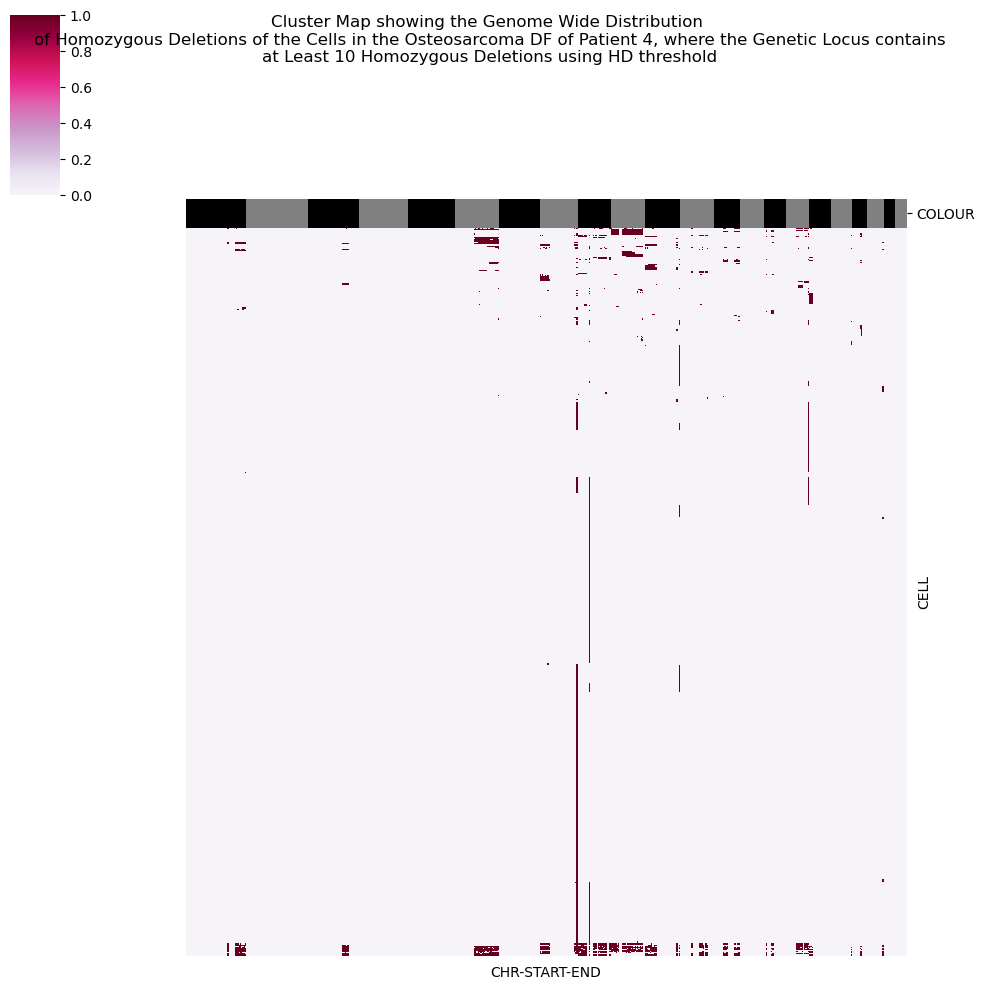

In [28]:
plt.figure(figsize=(12, 6))

HD_exp_heatmap = sns.clustermap(data=cells_w_HD_more_than_10_True_pivot, vmin=0, vmax=1, cmap='PuRd', xticklabels=False, yticklabels=False, 
                              col_cluster=False, row_cluster = True, col_colors=chrome_colours)
HD_exp_heatmap.ax_row_dendrogram.set_visible(False)
HD_exp_heatmap.fig.suptitle("""Cluster Map showing the Genome Wide Distribution 
of Homozygous Deletions of the Cells in the Osteosarcoma DF of Patient 4, where the Genetic Locus contains
at Least 10 Homozygous Deletions using HD threshold""")
HD_exp_heatmap


Making Freq. Plot

In [29]:
df

,#CHR,START,END,CELL,NORM_COUNT,COUNT,RDR,A_COUNT,B_COUNT,BAF,CLUSTER,HAP_CN,CORRECTED_HAP_CN,CHR,TOTAL_CN,COLOUR,HOMO_DEL
0,chr1,0,5000000,AAACCTGAGGAGTTTA,485820,541,0.760955,19,34,0.641509,20,1|1,1|1,1,2,black,False
1,chr1,0,5000000,AAACCTGAGGCTACGA,485820,574,0.806144,12,24,0.666667,20,1|1,1|1,1,2,black,False
2,chr1,0,5000000,AAACCTGCAGAGATCG,485820,820,1.232349,39,35,0.472973,20,1|1,1|1,1,2,black,False
3,chr1,0,5000000,AAACCTGGTCTTCGTC,485820,598,0.779433,15,13,0.464286,20,1|1,1|1,1,2,black,False
4,chr1,0,5000000,AAACCTGTCATTTCGT,485820,1103,1.155720,52,58,0.527273,20,1|1,1|1,1,2,black,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456345,chr22,50000000,50818468,TTTGTCACACTTCTTA,86720,167,0.795140,10,8,0.444444,20,1|1,1|1,22,2,gray,False
1456346,chr22,50000000,50818468,TTTGTCACATACTTGG,86720,122,0.791330,8,2,0.200000,20,1|1,1|1,22,2,gray,False
1456347,chr22,50000000,50818468,TTTGTCACATCACTGA,86720,38,0.926346,4,4,0.500000,20,1|1,1|1,22,2,gray,False
1456348,chr22,50000000,50818468,TTTGTCAGTACCTAGT,86720,194,0.976805,10,15,0.600000,20,1|1,1|1,22,2,gray,False


In [30]:
df_prop_HD_threshold = df.groupby(['CHR', 'START', 'END'])['RDR'].apply(lambda rdrs: (rdrs <= 0.00383).sum()/len(rdrs)).reset_index().reset_index()
df_prop_HD_threshold.rename(columns={'RDR': 'PROP_HD'}, inplace= True)
df_prop_HD_threshold

,index,CHR,START,END,PROP_HD
0,0,1,0,5000000,0.000000
1,1,1,5000000,10000000,0.000391
2,2,1,10000000,15000000,0.001566
3,3,1,15000000,20000000,0.000783
4,4,1,20000000,25000000,0.000783
...,...,...,...,...,...
565,565,22,30000000,35000000,0.000783
566,566,22,35000000,40000000,0.000783
567,567,22,40000000,45000000,0.000391
568,568,22,45000000,50000000,0.000783


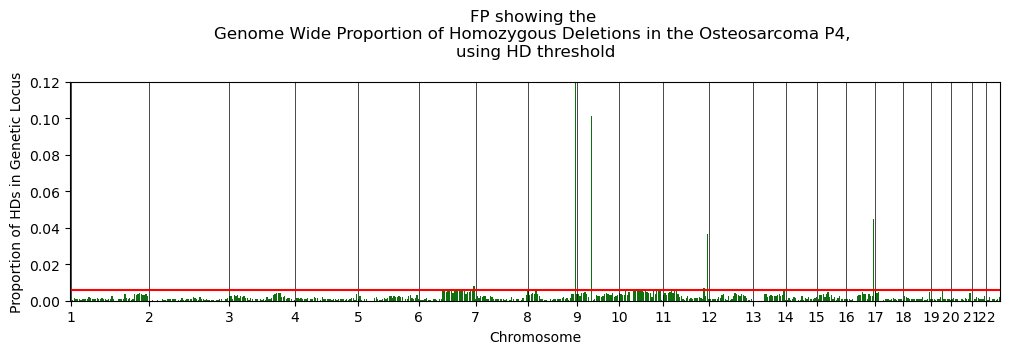

In [35]:
chromosome_pos = df_prop_HD_threshold.groupby('CHR')['index'].first()

plt.figure(figsize=(12,3))

sns.barplot(x= df_prop_HD_threshold['index'], y=df_prop_HD_threshold['PROP_HD'], color= 'green')

plt.xticks(chromosome_pos.values, chromosome_pos.index)

for starting_pos in chromosome_pos.values:
    plt.axvline(x=starting_pos, linewidth=0.5, color='black', linestyle='-')

plt.xlabel('Chromosome')

plt.ylim(0, 0.12)

plt.axhline(y=0.005871, color='r', linestyle='-')

plt.ylabel('Proportion of HDs in Genetic Locus')

plt.title("""FP showing the 
Genome Wide Proportion of Homozygous Deletions in the Osteosarcoma P4, 
using HD threshold
      """)

plt.gcf().subplots_adjust(bottom=0.15)

plt.savefig('OS_4_Freq_Plot.png', dpi=300)


In [32]:
x2 = df_prop_HD_threshold.nlargest(20, 'PROP_HD')
x2

,index,CHR,START,END,PROP_HD
309,309,8,145000000,145138636,0.127202
319,319,9,45000000,50000000,0.100978
492,492,16,90000000,90338345,0.045010
390,390,11,135000000,135086622,0.036399
247,247,6,170000000,170805979,0.008219
388,388,11,125000000,130000000,0.007045
231,231,6,90000000,95000000,0.006654
232,232,6,95000000,100000000,0.006262
238,238,6,125000000,130000000,0.006262
241,241,6,140000000,145000000,0.006262


In [33]:
# doc = docx.Document()

# t = doc.add_table(rows=x2.shape[0], cols=x2.shape[1])

# for i in range(x2.shape[0]):
#     for j in range(x2.shape[1]):
#         cell = x2.iat[i, j]
#         t.cell(i, j).text = str(cell)

# doc.save('OS_P4_genes_table_threshold.docx')